In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation

In [2]:
Xmin, Xmax, Npoints_x = 0.,2.,5
Tmin, Tmax, Npoints_t = 0.,50.,500

x = np.linspace(Xmin,Xmax,Npoints_x)
t = np.linspace(Tmin,Tmax,Npoints_t)

deltat = (Tmax-Tmin)/(Npoints_t-1)
deltax = (Xmax-Xmin)/(Npoints_x-1)

# Conductividad
k = 0.075

lambda_ = (k*deltat)/deltax

print(deltat, deltax, lambda_)

0.10020040080160321 0.5 0.01503006012024048


In [24]:
# Definir condiciones a la frontera

def h1(t):
    return 100.
def h2(t):
    #return 50.
    return 50.*np.exp(-t)

In [25]:
# Definir el campo de temperaturas
T = np.zeros((Npoints_t,Npoints_x))

# Inicializo las fronteras
T[:,0] = h1(0)
T[:,-1] = h2(0)

In [26]:
print(T)

[[100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 ...
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]]


In [28]:
# Evolucionar

for l in range(1, len(t)):
    
    # si tenemos fronteras moviles aqui es el lugar
    T[l,-1] = h2(t[l])
    
    for i in range(1, len(x)-1): # no tocar fronteras 
        T[l,i] = T[l-1,i] + lambda_*(T[l-1,i+1]-2*T[l-1,i]+T[l-1,i-1])  

In [29]:
print(T)

[[1.00000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]
 [1.00000000e+02 1.50300601e+00 0.00000000e+00 7.51503006e-01
  4.52328053e+01]
 [1.00000000e+02 2.96083148e+00 3.38854061e-02 1.40876452e+00
  4.09201335e+01]
 ...
 [1.00000000e+02 7.45002681e+01 4.92932835e+01 2.45002839e+01
  1.17836239e-20]
 [1.00000000e+02 7.45046681e+01 4.92995058e+01 2.45046835e+01
  1.06601273e-20]
 [1.00000000e+02 7.45090293e+01 4.93056732e+01 2.45090443e+01
  9.64374924e-21]]


<IPython.core.display.Javascript object>


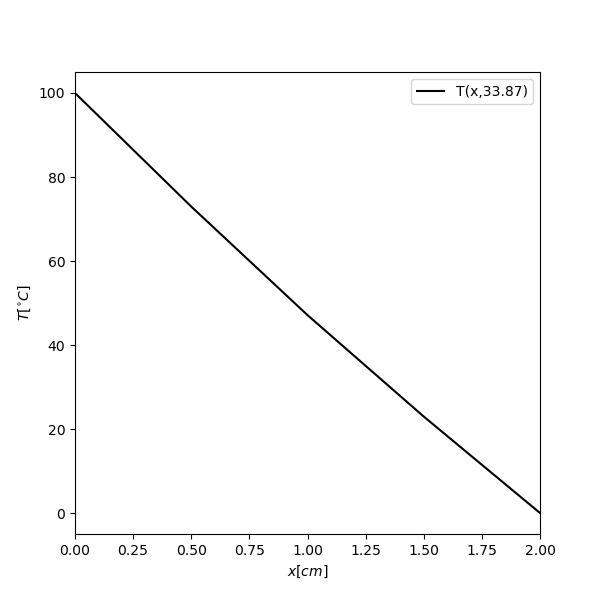

In [30]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
plt.xlabel(r'$x[cm]$')
plt.ylabel(r'$T[^{\circ}C]$')

for i in range(len(t)):
    plt.plot(x,T[i,:], label=r'$T(x,%.2f)$' %(t[i]))

<IPython.core.display.Javascript object>


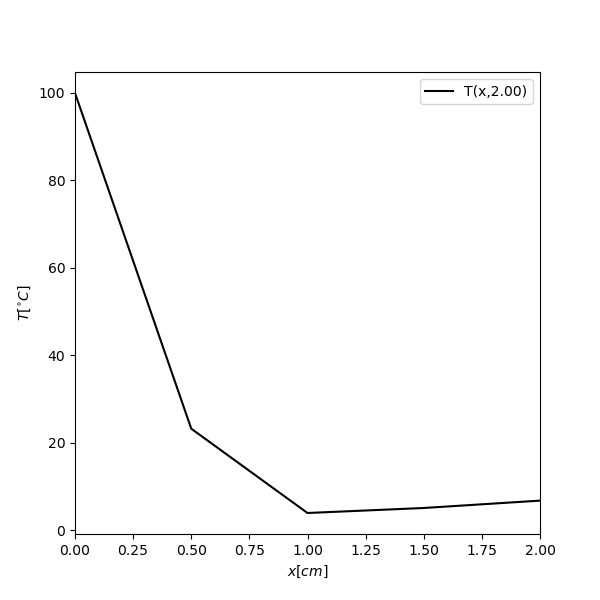

In [31]:
Nframes = len(t)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(Xmin,Xmax)
    ax.set_xlabel(r'$x[cm]$')
    ax.set_ylabel(r'$T[^{\circ}C]$')
    
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.plot(x, T[i,:], color='k', label=r'T(x,%.2f)' %(t[i]))
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=Nframes, init_func=init)